In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import json
from collections import Counter
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

# Set plot style
plt.style.use('fivethirtyeight')
sns.set(style="darkgrid")

In [31]:
# Load the data from JSON file
print("Loading data from JSON file...")
with open('netflix_de_data_single_file.json', 'r', encoding='utf-8') as f:
    # Read the file line by line and parse each line as a JSON object
    data = [json.loads(line) for line in f]

# Convert to DataFrame
df = pd.DataFrame(data)
print(f"Data loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")

Loading data from JSON file...
Data loaded successfully with 7472 rows and 21 columns.


In [32]:
# Display basic information about the dataset
print(f"\nDataset Shape: {(df.count(), len(df.columns))}")


Dataset Shape: (show_id               7472
type                  7472
title                 7472
director              7472
cast                  7472
date_added            7472
release_year          7472
rating                7472
movie_duration        5421
seasons               2051
description           7472
released_countries    7472
released_languages    7472
movie_type            5421
show_type             2051
genres                7472
added_date            7402
year                  7402
month                 7402
day                   7402
day_of_week           7402
dtype: int64, 21)


In [33]:
# Display basic information about the dataset
print("\nBasic Dataset Information:")
print(f"Total number of shows: {df.shape[0]}")
print(f"Movies: {df[df['type'] == 'Movie'].shape[0]}")
print(f"TV Shows: {df[df['type'] == 'TV Show'].shape[0]}")


Basic Dataset Information:
Total number of shows: 7472
Movies: 5421
TV Shows: 2051


In [34]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
show_id                  0
type                     0
title                    0
director                 0
cast                     0
date_added               0
release_year             0
rating                   0
movie_duration        2051
seasons               5421
description              0
released_countries       0
released_languages       0
movie_type            2051
show_type             5421
genres                   0
added_date              70
year                    70
month                   70
day                     70
day_of_week             70
dtype: int64


In [35]:
# Data types
print("\nData Types:")
print(df.dtypes)

# Convert date_added to datetime
df['added_date'] = pd.to_datetime(df['added_date'])


Data Types:
show_id                object
type                   object
title                  object
director               object
cast                   object
date_added             object
release_year            int64
rating                 object
movie_duration        float64
seasons               float64
description            object
released_countries     object
released_languages     object
movie_type             object
show_type              object
genres                 object
added_date             object
year                   object
month                  object
day                    object
day_of_week            object
dtype: object



1. Content Type Analysis


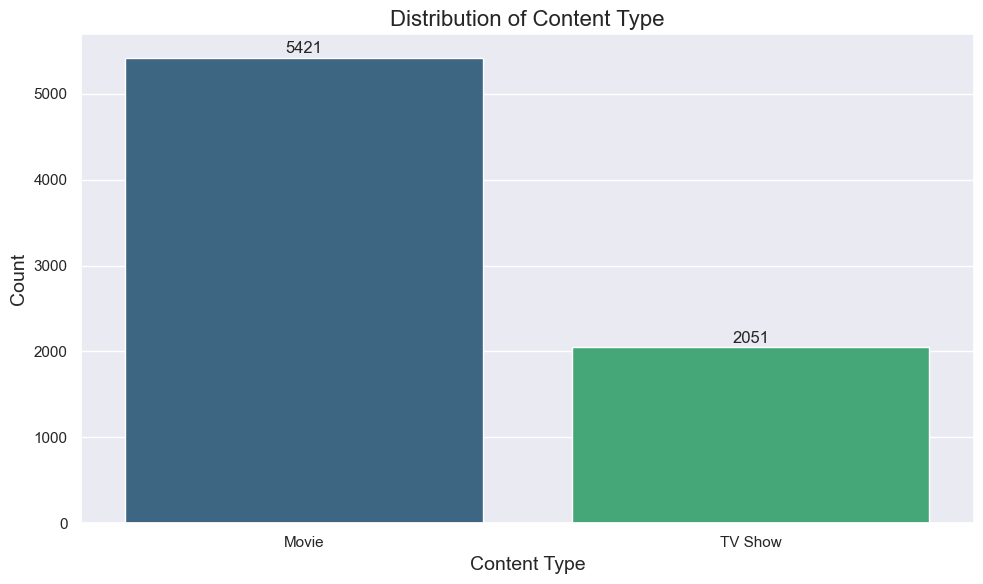

In [36]:
# 1. Content Type Analysis
print("\n1. Content Type Analysis")

# Distribution of content type (Movie vs TV Show)
type_counts = df['type'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis', ax=ax)
ax.set_title('Distribution of Content Type', fontsize=16)
ax.set_xlabel('Content Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
for i, v in enumerate(type_counts.values):
    ax.text(i, v + 50, str(v), ha='center', fontsize=12)
plt.tight_layout()
plt.savefig('content_type_distribution.png')

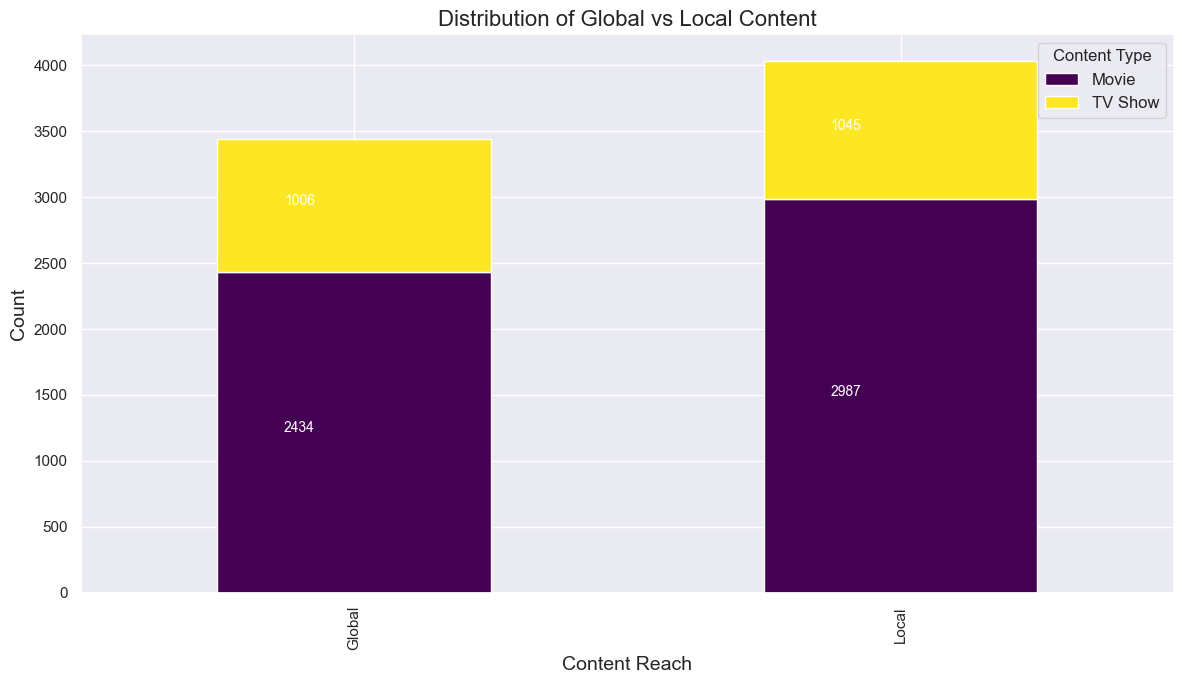

In [37]:
# Distribution of Global vs Local content
type_distribution = pd.DataFrame()
type_distribution['Movie'] = [df[(df['type'] == 'Movie') & (df['movie_type'] == 'Global')].shape[0], 
                             df[(df['type'] == 'Movie') & (df['movie_type'] == 'Local')].shape[0]]
type_distribution['TV Show'] = [df[(df['type'] == 'TV Show') & (df['show_type'] == 'Global')].shape[0], 
                               df[(df['type'] == 'TV Show') & (df['show_type'] == 'Local')].shape[0]]
type_distribution.index = ['Global', 'Local']

fig, ax = plt.subplots(figsize=(12, 7))
type_distribution.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Distribution of Global vs Local Content', fontsize=16)
ax.set_xlabel('Content Reach', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(title='Content Type', fontsize=12)

# Add count labels
for i, v in enumerate(type_distribution['Movie']):
    ax.text(i - 0.1, v/2, str(v), ha='center', fontsize=10, color='white')
    
for i, v in enumerate(type_distribution['TV Show']):
    ax.text(i - 0.1, type_distribution['Movie'][i] + v/2, str(v), ha='center', fontsize=10, color='white')

plt.tight_layout()
plt.savefig('global_local_distribution.png')


2. Temporal Analysis


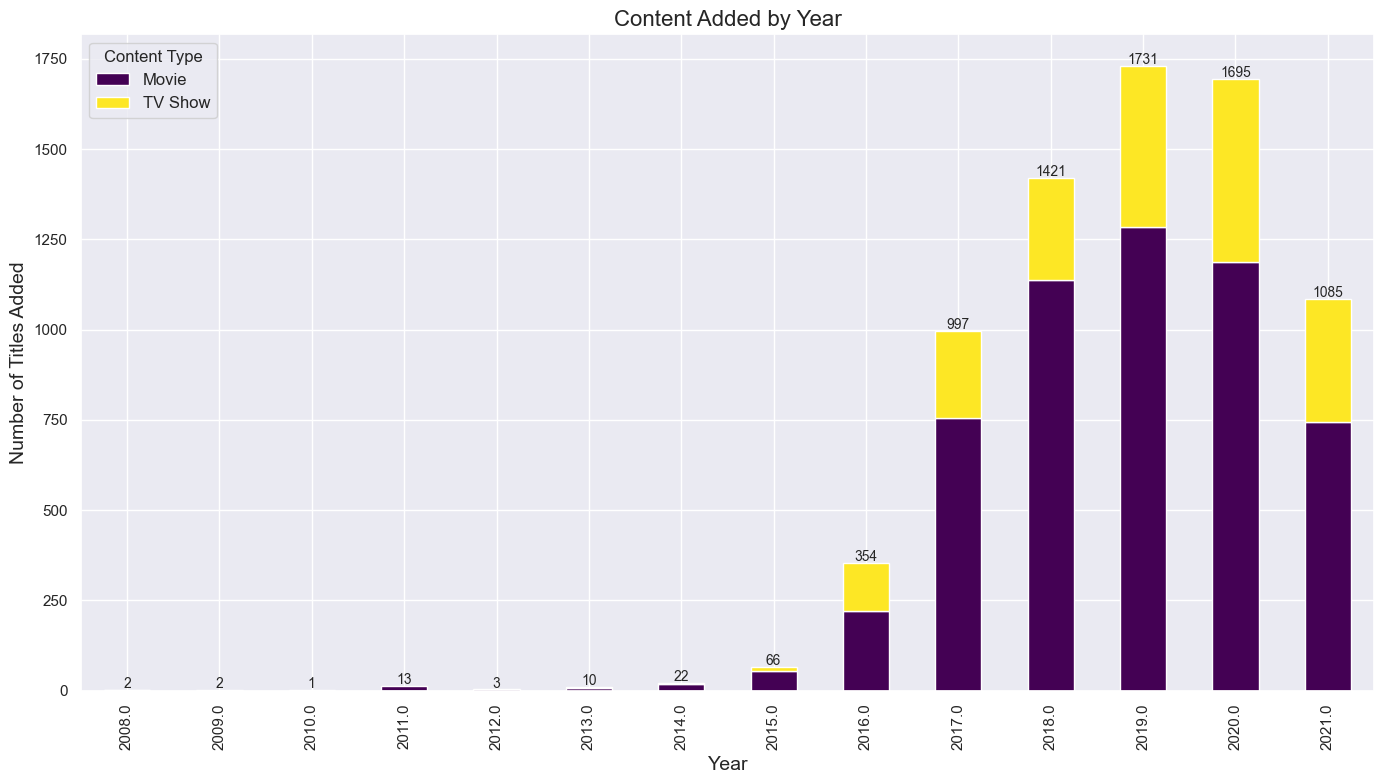

In [38]:
# 2. Temporal Analysis
print("\n2. Temporal Analysis")

# Content added over time (by year)
yearly_additions = df.groupby([df['added_date'].dt.year, 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(14, 8))
yearly_additions.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Content Added by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Titles Added', fontsize=14)
ax.legend(title='Content Type', fontsize=12)

# Add total count labels
for i, total in enumerate(yearly_additions.sum(axis=1)):
    ax.text(i, total + 5, str(int(total)), ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('yearly_content_additions.png')

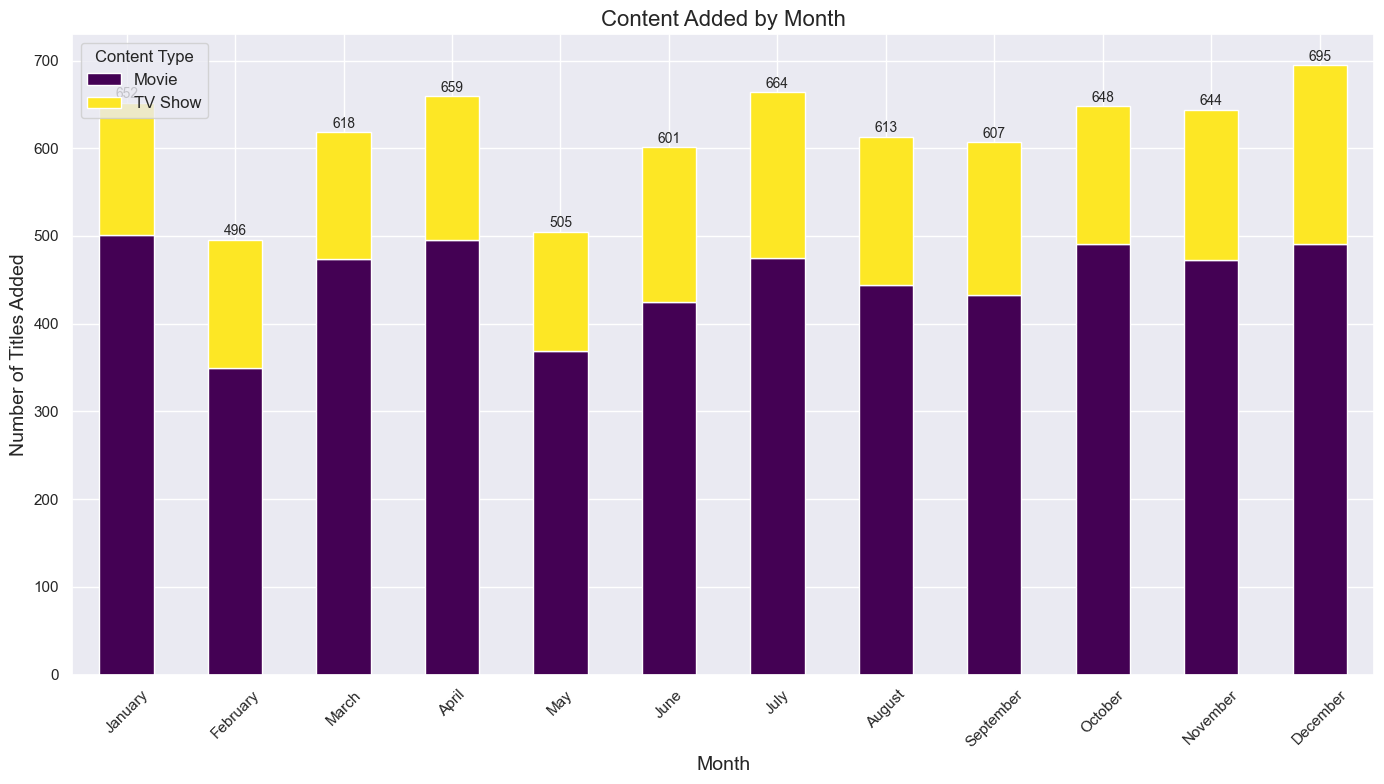

In [39]:
# Content added by month
monthly_additions = df.groupby([df['month'], 'type']).size().unstack().fillna(0)

# Reorder months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_additions = monthly_additions.reindex(month_order)

fig, ax = plt.subplots(figsize=(14, 8))
monthly_additions.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Content Added by Month', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Number of Titles Added', fontsize=14)
ax.legend(title='Content Type', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add total count labels
for i, total in enumerate(monthly_additions.sum(axis=1)):
    ax.text(i, total + 5, str(int(total)), ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('monthly_content_additions.png')

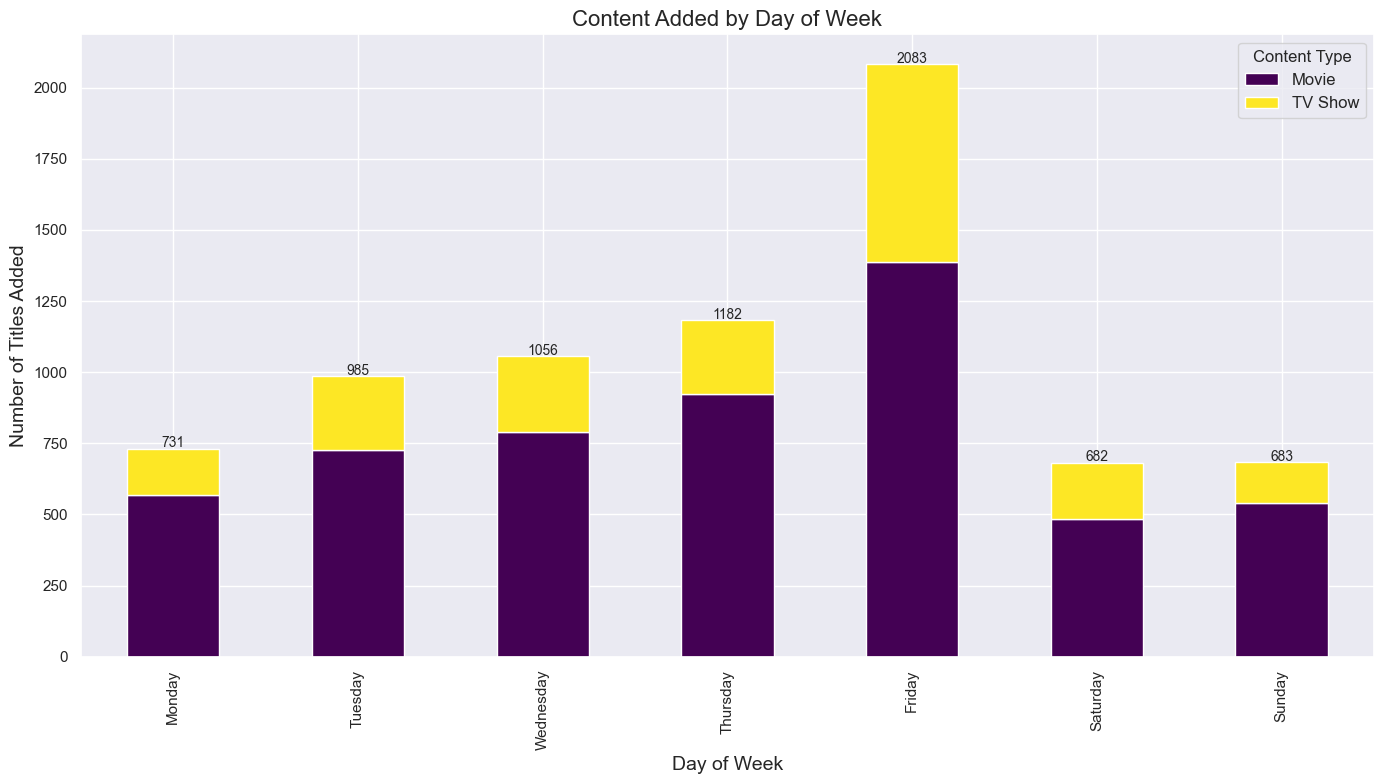

In [40]:
# Content added by day of week
day_of_week_additions = df.groupby([df['day_of_week'], 'type']).size().unstack().fillna(0)

# Reorder days chronologically
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_additions = day_of_week_additions.reindex(day_order)

fig, ax = plt.subplots(figsize=(14, 8))
day_of_week_additions.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Content Added by Day of Week', fontsize=16)
ax.set_xlabel('Day of Week', fontsize=14)
ax.set_ylabel('Number of Titles Added', fontsize=14)
ax.legend(title='Content Type', fontsize=12)

# Add total count labels
for i, total in enumerate(day_of_week_additions.sum(axis=1)):
    ax.text(i, total + 5, str(int(total)), ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('day_of_week_content_additions.png')

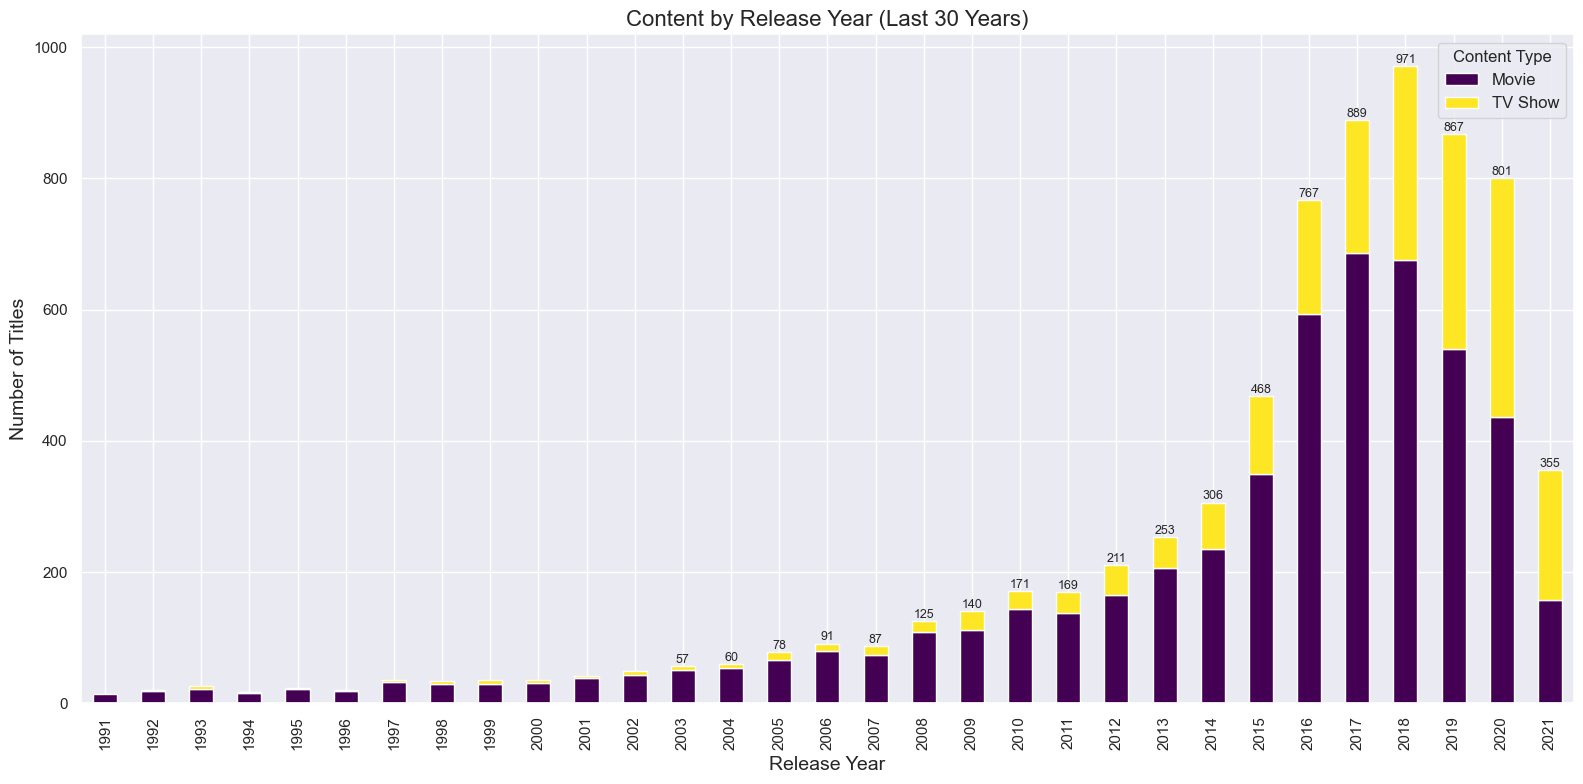

In [41]:
# Content by release year
release_year_counts = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Filter to recent years for better visualization (last 30 years)
recent_years = release_year_counts.index >= (release_year_counts.index.max() - 30)
recent_release_years = release_year_counts[recent_years]

fig, ax = plt.subplots(figsize=(16, 8))
recent_release_years.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Content by Release Year (Last 30 Years)', fontsize=16)
ax.set_xlabel('Release Year', fontsize=14)
ax.set_ylabel('Number of Titles', fontsize=14)
ax.legend(title='Content Type', fontsize=12)

# Add total count labels for years with significant content
for i, total in enumerate(recent_release_years.sum(axis=1)):
    if total > 50:  # Only show labels for years with more than 50 titles
        ax.text(i, total + 5, str(int(total)), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('release_year_distribution.png')


3. Ratings Analysis


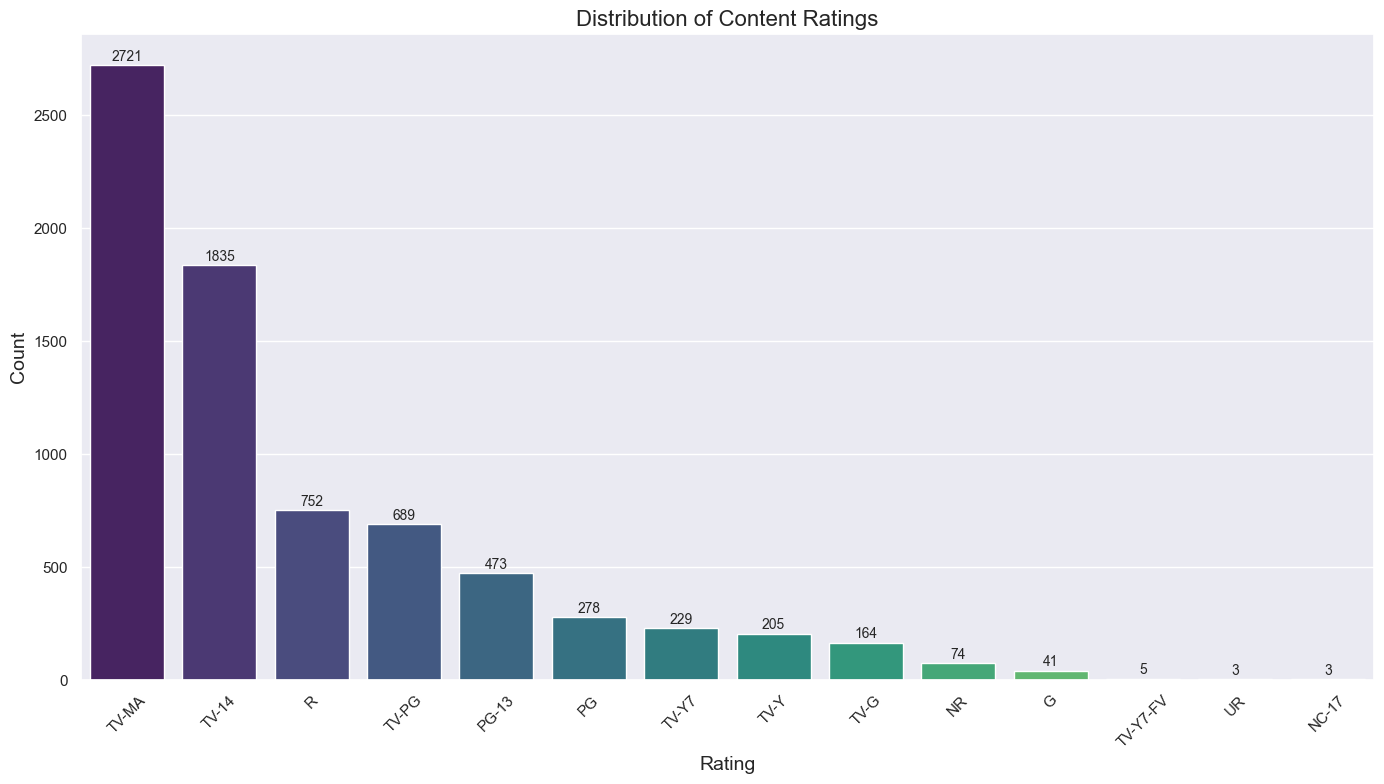

In [42]:
# 3. Ratings Analysis
print("\n3. Ratings Analysis")

# Distribution of ratings
rating_counts = df['rating'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis', ax=ax)
ax.set_title('Distribution of Content Ratings', fontsize=16)
ax.set_xlabel('Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add count labels
for i, v in enumerate(rating_counts.values):
    ax.text(i, v + 20, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('rating_distribution.png')

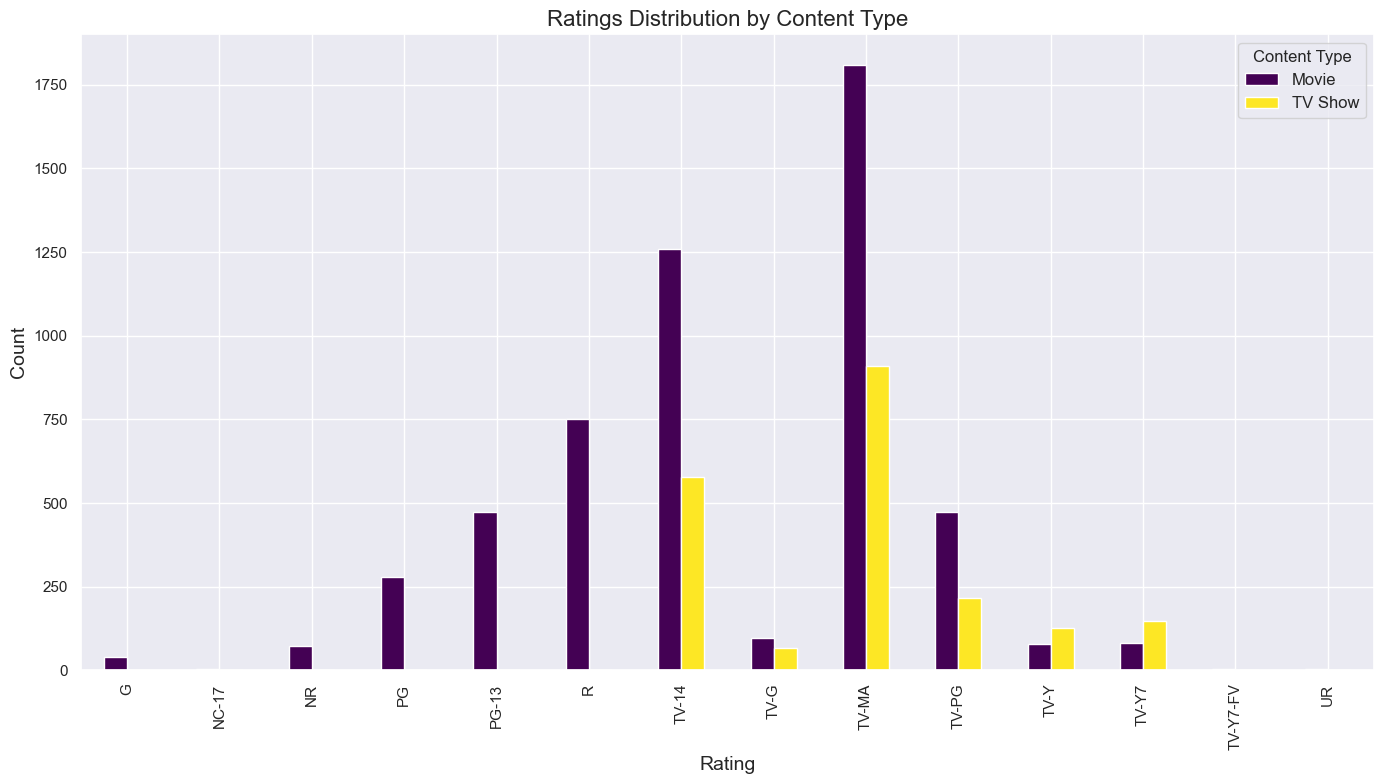

In [43]:
# Ratings distribution by content type
rating_by_type = pd.crosstab(df['rating'], df['type'])

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(14, 8))
rating_by_type.plot(kind='bar', ax=ax, colormap='viridis')
ax.set_title('Ratings Distribution by Content Type', fontsize=16)
ax.set_xlabel('Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(title='Content Type', fontsize=12)

plt.tight_layout()
plt.savefig('rating_by_type.png')


4. Duration Analysis


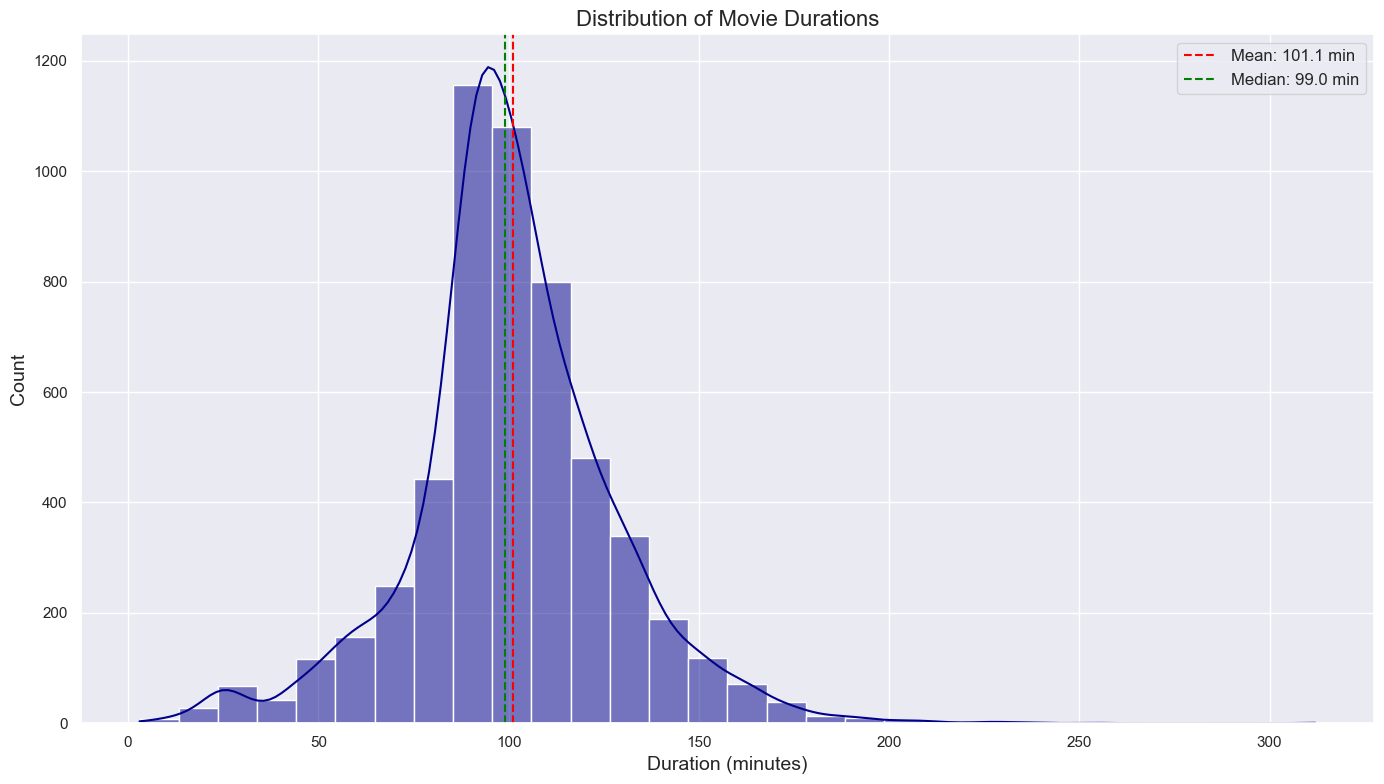

In [44]:
# 4. Duration Analysis
print("\n4. Duration Analysis")

# Movie duration distribution
movie_durations = df[df['type'] == 'Movie']['movie_duration'].dropna()

fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(movie_durations, bins=30, kde=True, ax=ax, color='darkblue')
ax.set_title('Distribution of Movie Durations', fontsize=16)
ax.set_xlabel('Duration (minutes)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.axvline(movie_durations.mean(), color='red', linestyle='--', label=f'Mean: {movie_durations.mean():.1f} min')
ax.axvline(movie_durations.median(), color='green', linestyle='--', label=f'Median: {movie_durations.median():.1f} min')
ax.legend(fontsize=12)

plt.tight_layout()
plt.savefig('movie_duration_distribution.png')

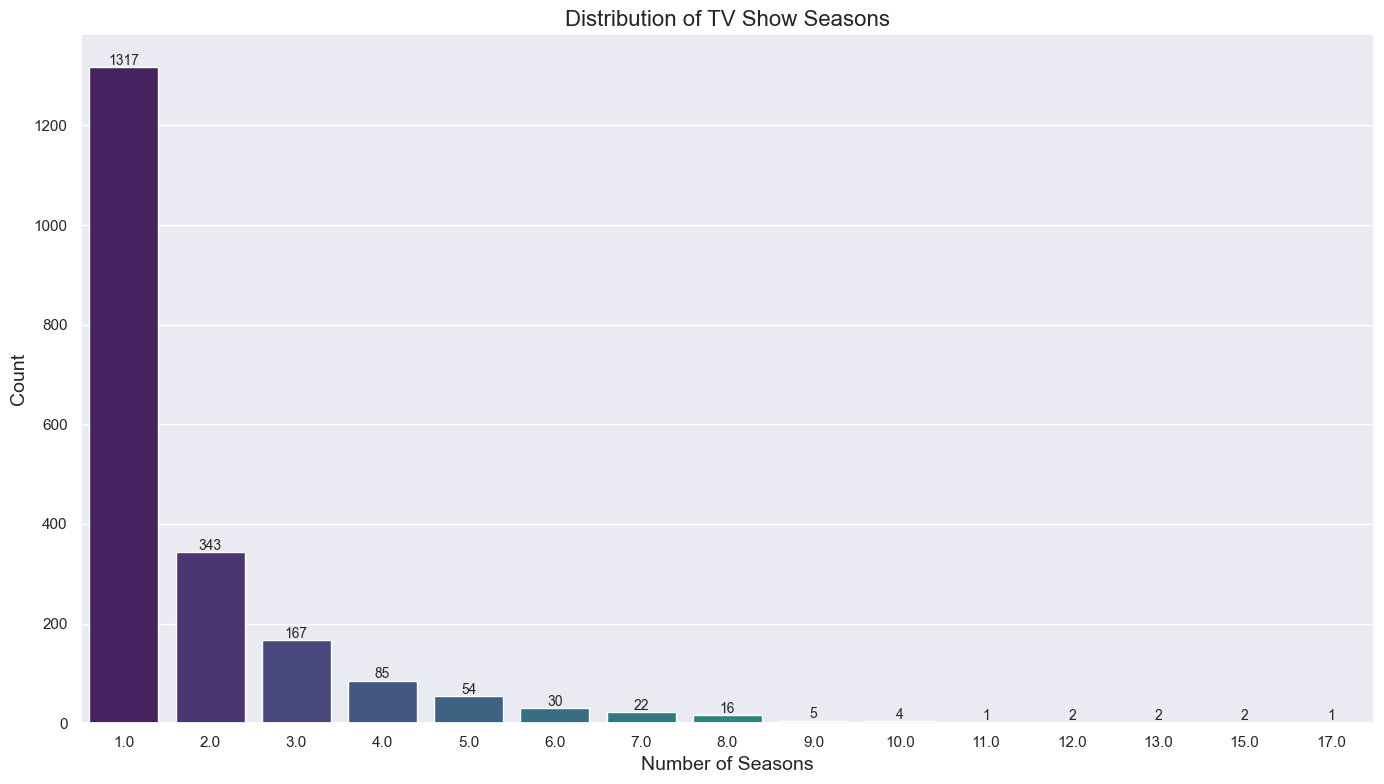

In [45]:
# TV Show seasons distribution
tv_seasons = df[df['type'] == 'TV Show']['seasons'].dropna()

fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x=tv_seasons, palette='viridis', ax=ax)
ax.set_title('Distribution of TV Show Seasons', fontsize=16)
ax.set_xlabel('Number of Seasons', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Add count labels
for i, v in enumerate(tv_seasons.value_counts().sort_index()):
    ax.text(i, v + 5, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('tv_seasons_distribution.png')


5. Genre Analysis


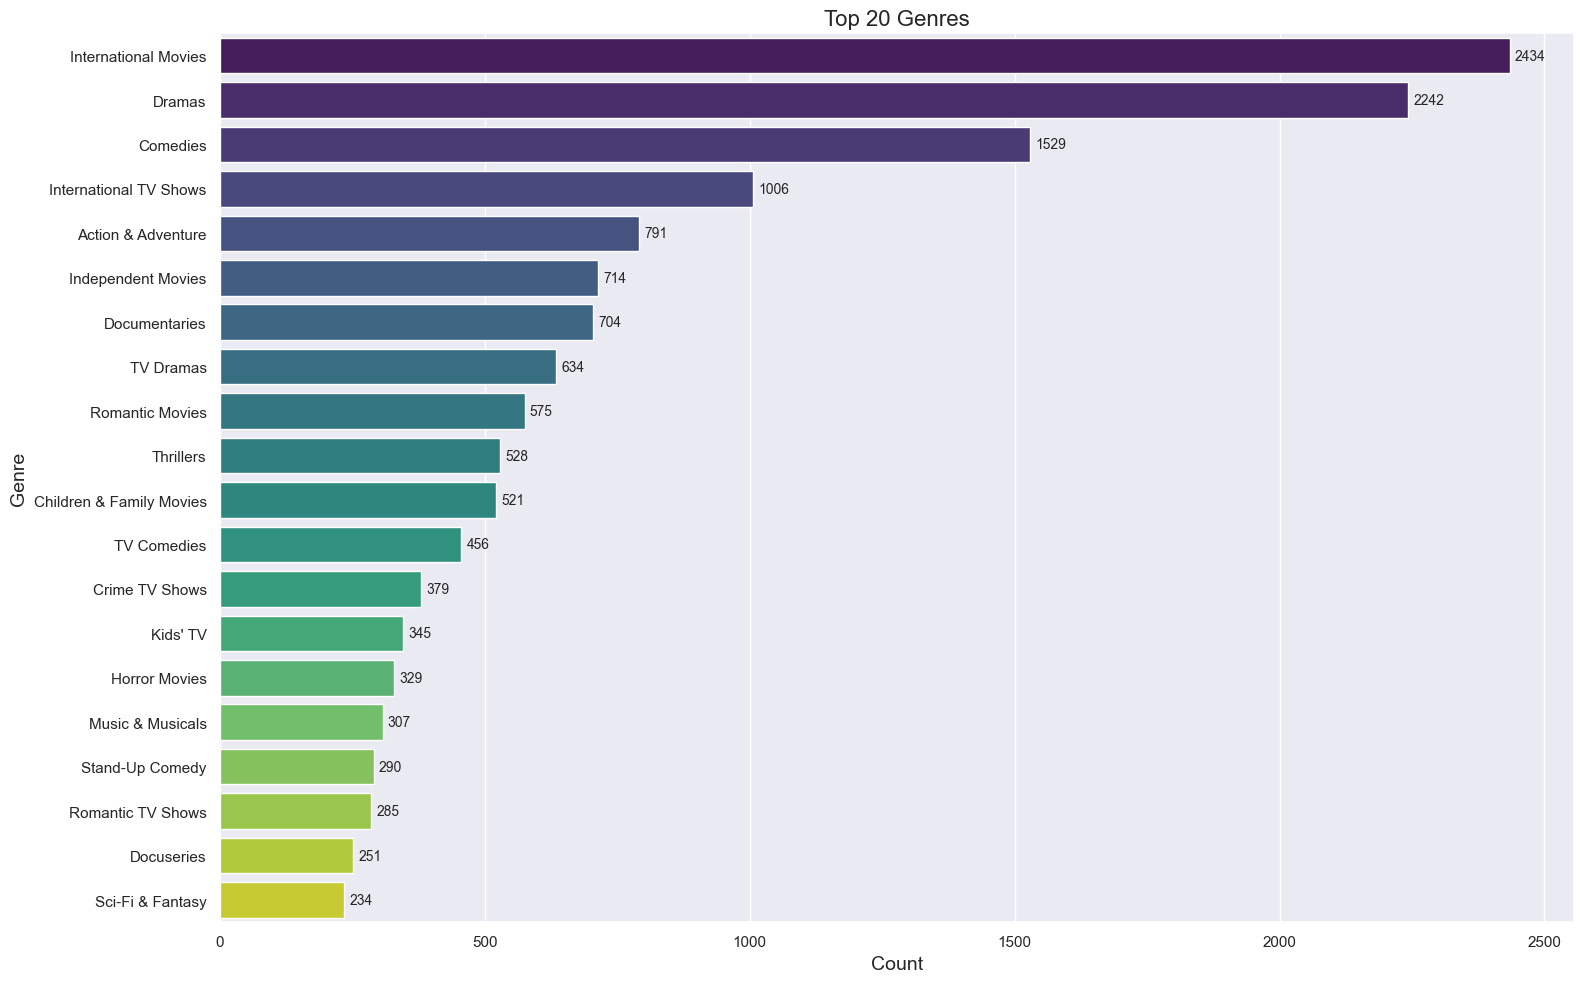

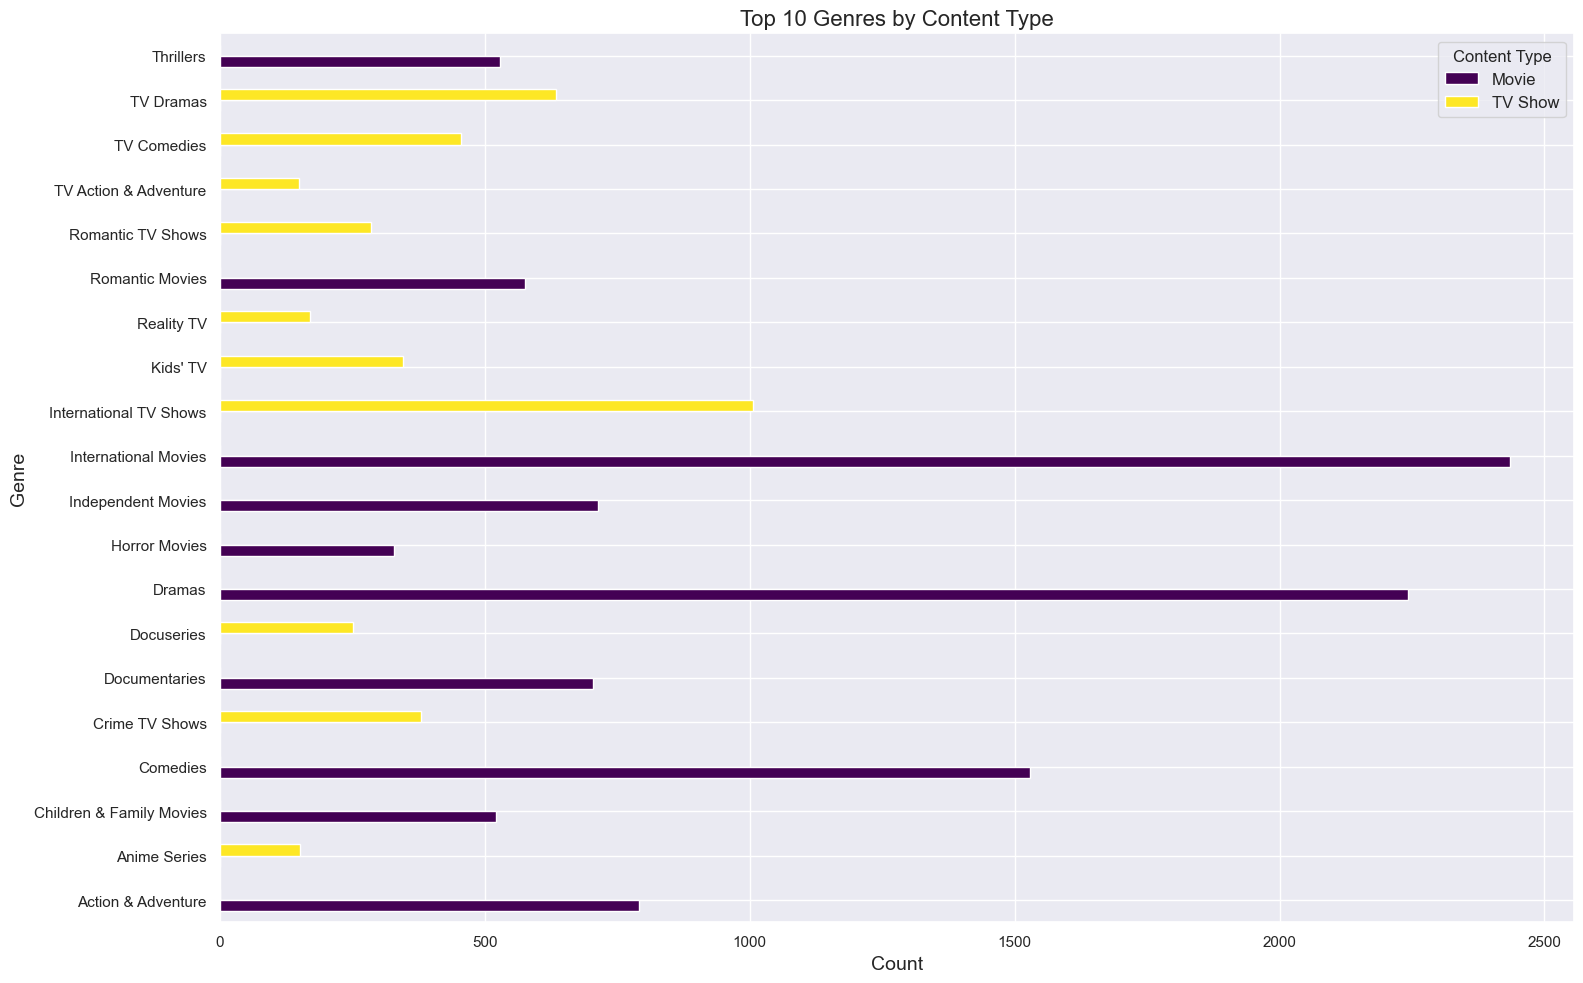

In [46]:

# 5. Genre Analysis
print("\n5. Genre Analysis")

# Extract all genres
all_genres = [genre for genres_list in df['genres'] for genre in genres_list]
genre_counts = pd.Series(all_genres).value_counts().sort_values(ascending=False)

# Plot top 20 genres
top_genres = genre_counts.head(20)

fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis', ax=ax)
ax.set_title('Top 20 Genres', fontsize=16)
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Genre', fontsize=14)

# Add count labels
for i, v in enumerate(top_genres.values):
    ax.text(v + 10, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.savefig('top_genres.png')

# Genre distribution by content type
genre_by_type = {}
for content_type in ['Movie', 'TV Show']:
    type_genres = [genre for genres_list in df[df['type'] == content_type]['genres'] for genre in genres_list]
    genre_by_type[content_type] = pd.Series(type_genres).value_counts().head(10)

# Create a DataFrame for plotting
genre_type_df = pd.DataFrame({
    'Movie': pd.Series(genre_by_type['Movie']),
    'TV Show': pd.Series(genre_by_type['TV Show'])
}).fillna(0)

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
genre_type_df.plot(kind='barh', ax=ax, colormap='viridis')
ax.set_title('Top 10 Genres by Content Type', fontsize=16)
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Genre', fontsize=14)
ax.legend(title='Content Type', fontsize=12)

plt.tight_layout()
plt.savefig('genre_by_content_type.png')


6. Country Analysis


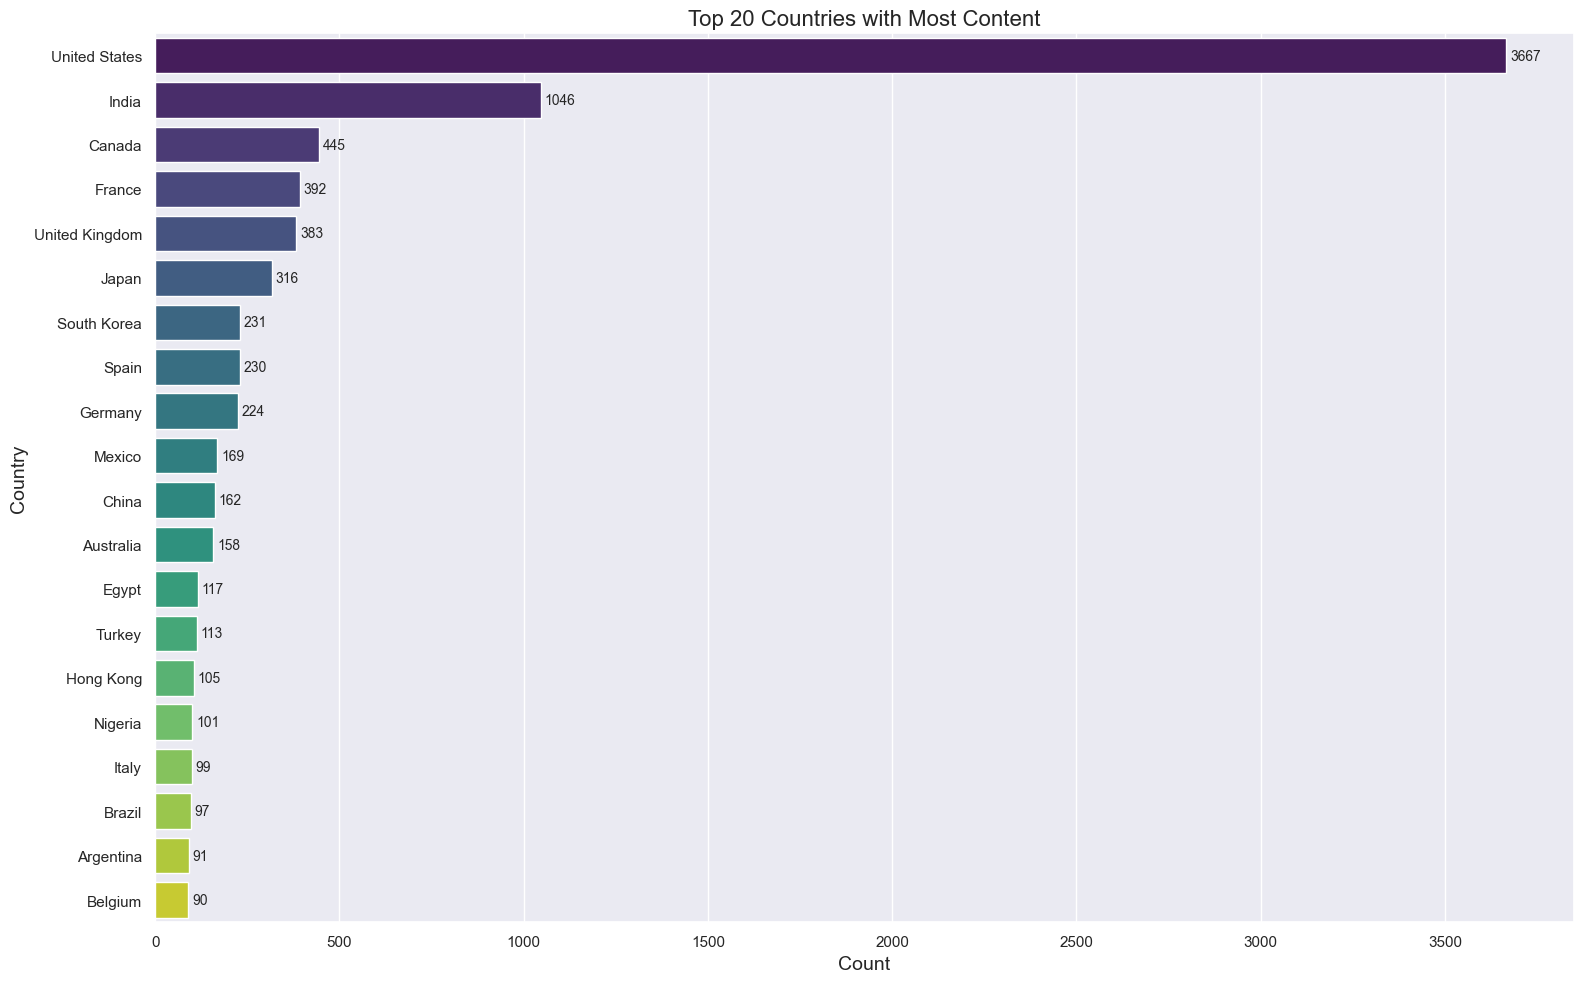

In [47]:
# 6. Country Analysis
print("\n6. Country Analysis")

# Extract all countries
all_countries = [country for countries_list in df['released_countries'] for country in countries_list]
country_counts = pd.Series(all_countries).value_counts().sort_values(ascending=False)

# Plot top 20 countries
top_countries = country_counts.head(20)

fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', ax=ax)
ax.set_title('Top 20 Countries with Most Content', fontsize=16)
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Country', fontsize=14)

# Add count labels
for i, v in enumerate(top_countries.values):
    ax.text(v + 10, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.savefig('top_countries.png')

# Create a world map visualization using Plotly
country_df = pd.DataFrame({
    'country': country_counts.index,
    'count': country_counts.values
})

fig = px.choropleth(
    country_df,
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Netflix Content Distribution by Country'
)
fig.update_layout(coloraxis_colorbar=dict(title='Number of Titles'))
fig.write_html('country_distribution_map.html')


7. Language Analysis


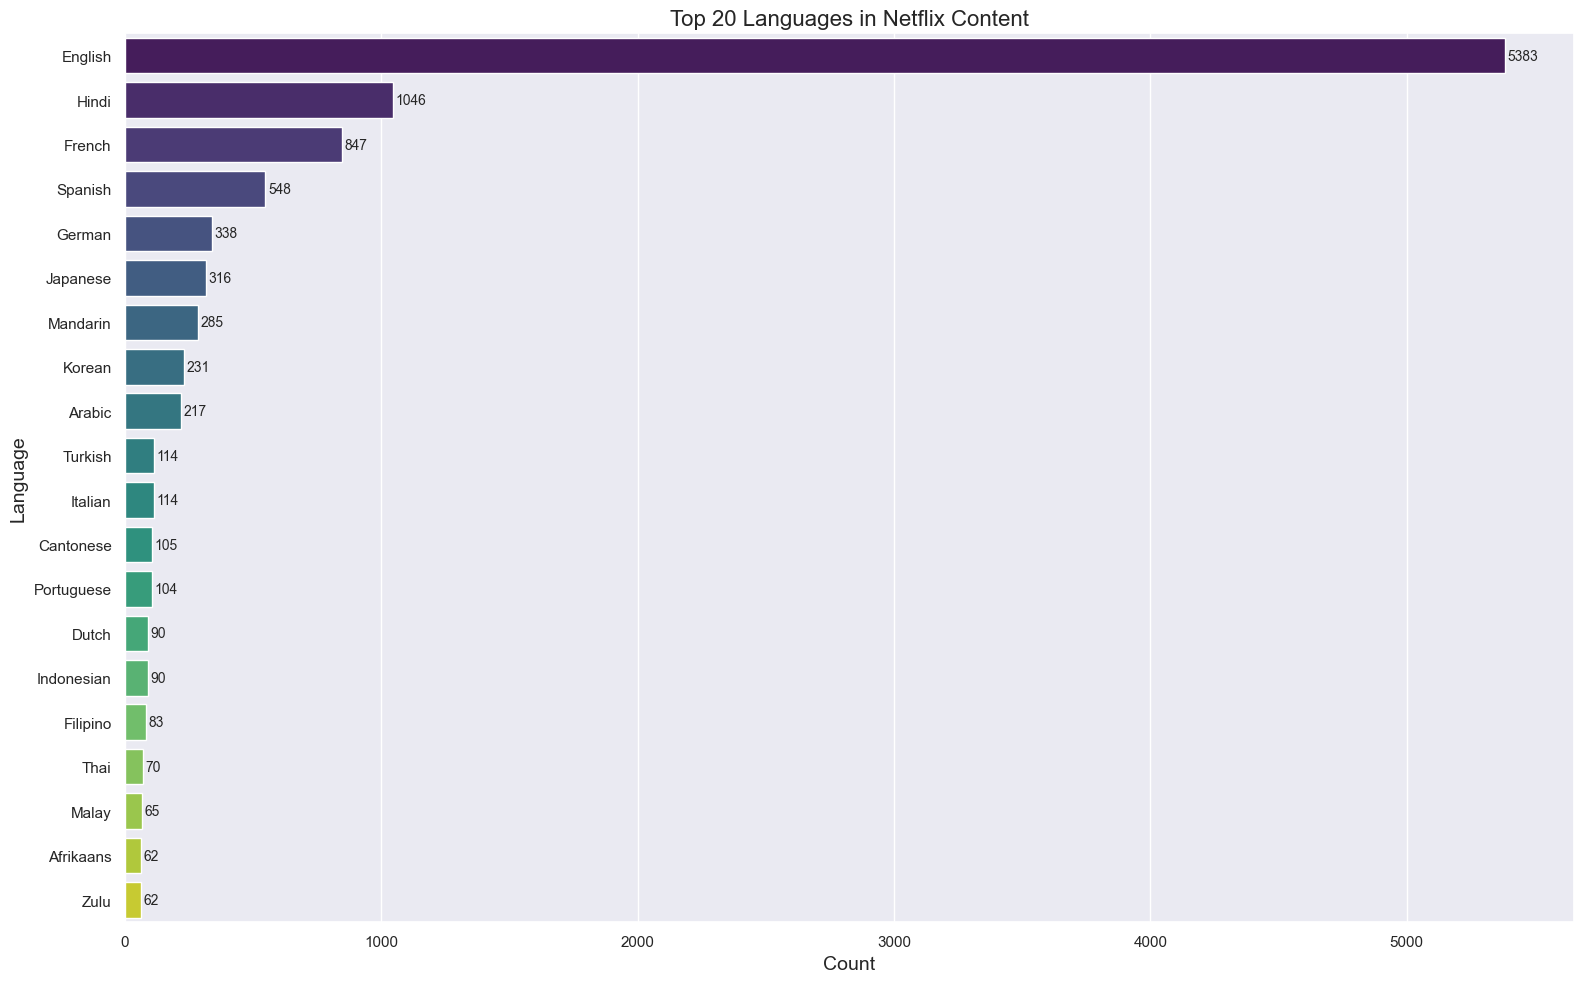

In [26]:
# 7. Language Analysis
print("\n7. Language Analysis")

# Extract all languages
all_languages = [lang for langs_list in df['released_languages'] for lang in langs_list]
language_counts = pd.Series(all_languages).value_counts().sort_values(ascending=False)

# Plot top 20 languages
top_languages = language_counts.head(20)

fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x=top_languages.values, y=top_languages.index, palette='viridis', ax=ax)
ax.set_title('Top 20 Languages in Netflix Content', fontsize=16)
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Language', fontsize=14)

# Add count labels
for i, v in enumerate(top_languages.values):
    ax.text(v + 10, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.savefig('top_languages.png')


8. Director Analysis


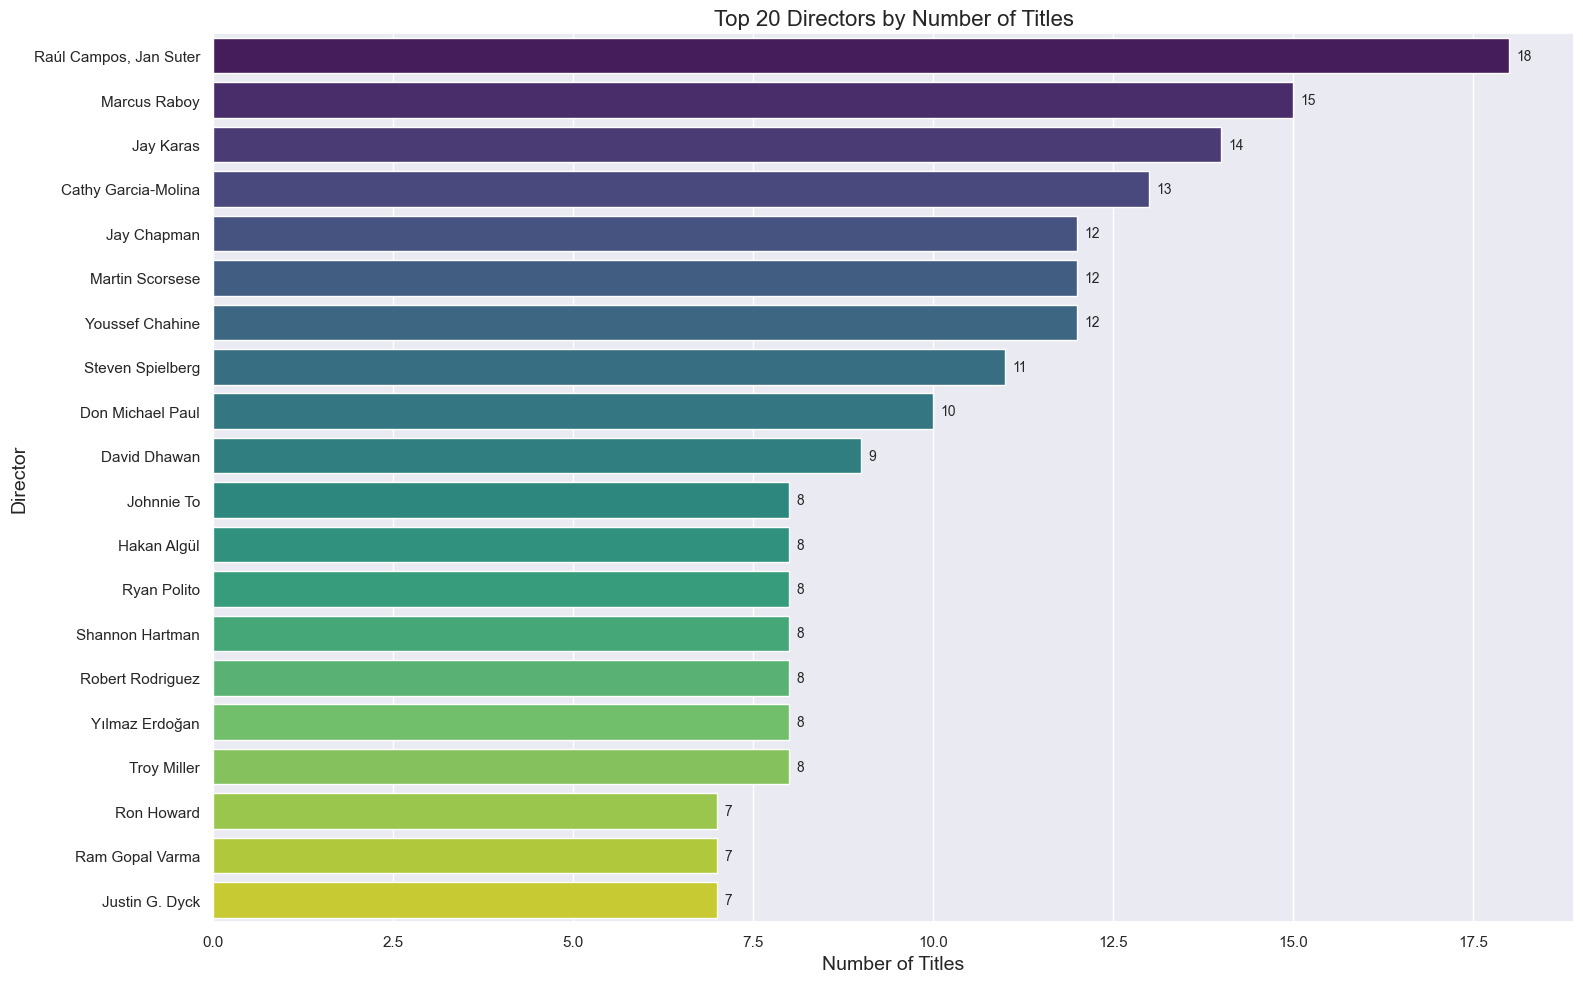

In [27]:
# 8. Director Analysis
print("\n8. Director Analysis")

# Filter out 'Unknown' directors and count
director_counts = df[df['director'] != 'Unknown']['director'].value_counts().head(20)

fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='viridis', ax=ax)
ax.set_title('Top 20 Directors by Number of Titles', fontsize=16)
ax.set_xlabel('Number of Titles', fontsize=14)
ax.set_ylabel('Director', fontsize=14)

# Add count labels
for i, v in enumerate(director_counts.values):
    ax.text(v + 0.1, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.savefig('top_directors.png')


9. Cast Analysis


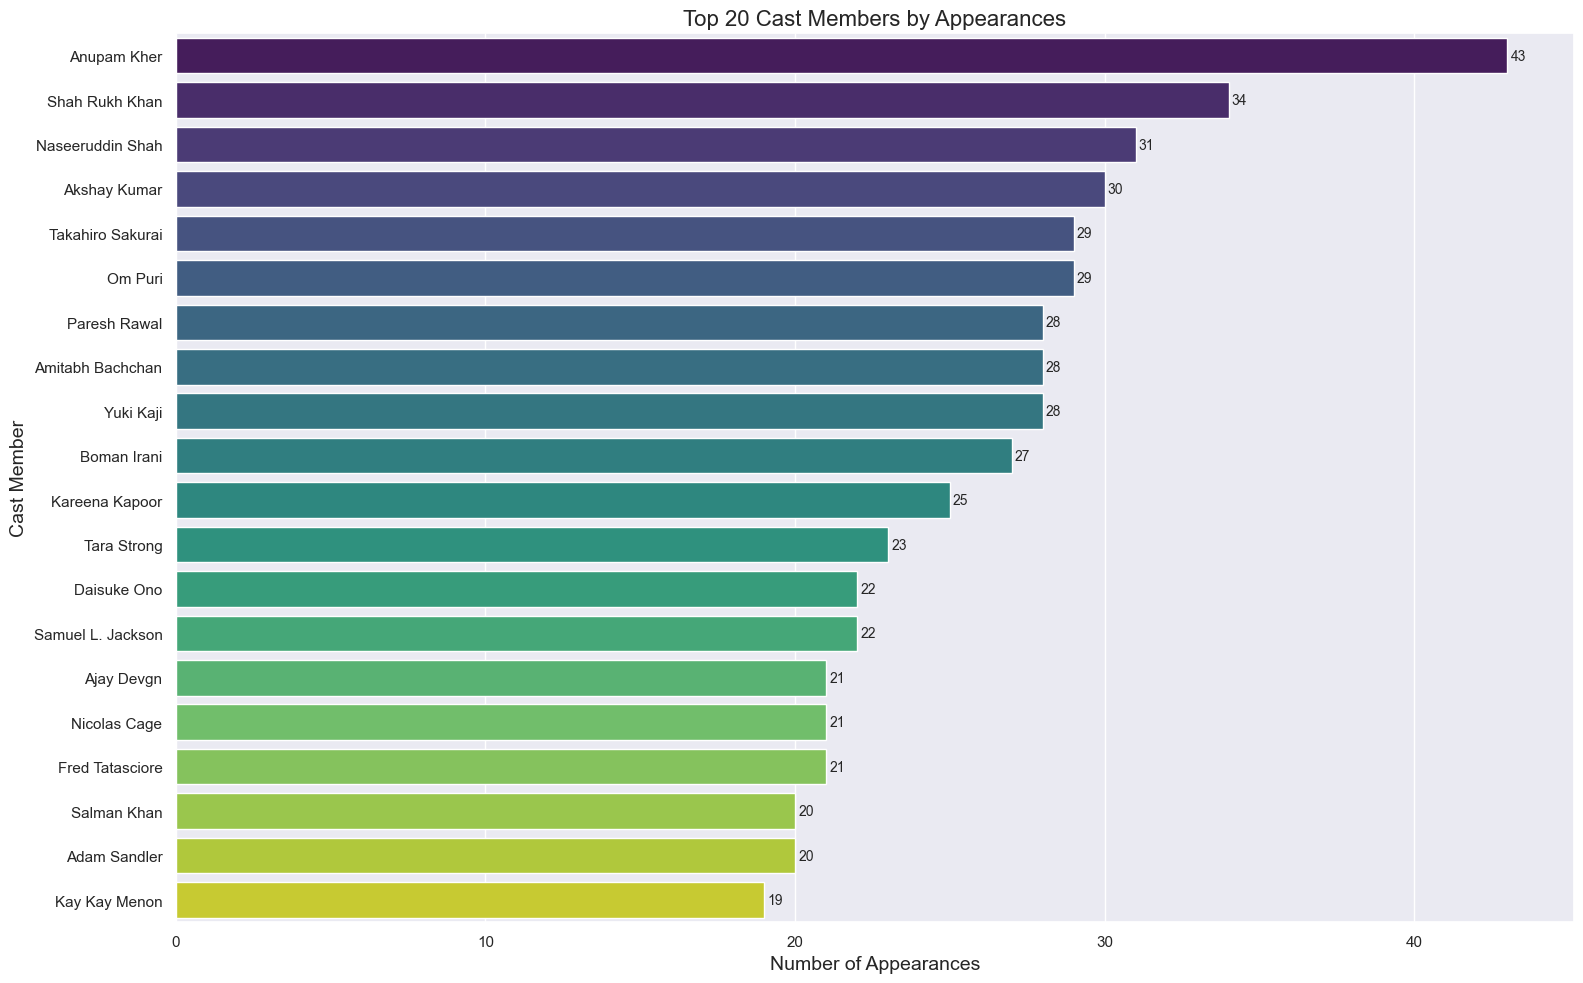

In [28]:
# 9. Cast Analysis
print("\n9. Cast Analysis")

# Extract all cast members
all_cast = []
for cast_list in df['cast']:
    if isinstance(cast_list, str) and cast_list != 'Unknown':
        all_cast.extend([cast.strip() for cast in cast_list.split(',')])

cast_counts = pd.Series(all_cast).value_counts().head(20)

fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x=cast_counts.values, y=cast_counts.index, palette='viridis', ax=ax)
ax.set_title('Top 20 Cast Members by Appearances', fontsize=16)
ax.set_xlabel('Number of Appearances', fontsize=14)
ax.set_ylabel('Cast Member', fontsize=14)

# Add count labels
for i, v in enumerate(cast_counts.values):
    ax.text(v + 0.1, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.savefig('top_cast.png')


10. Word Cloud for Descriptions


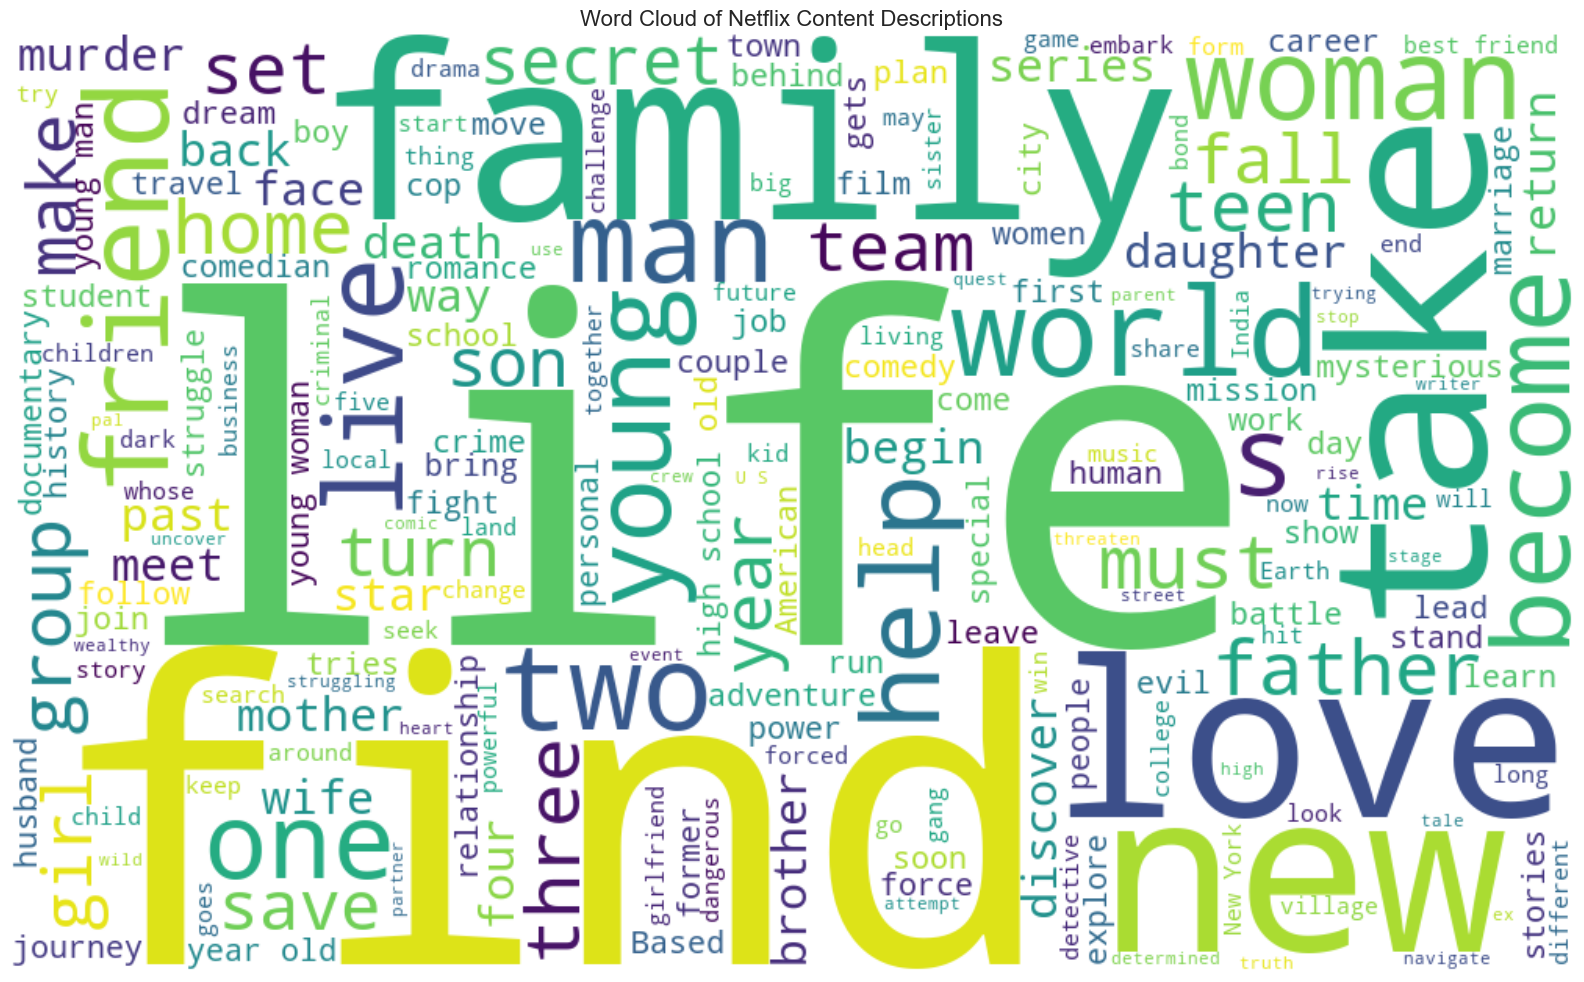

In [29]:
# 10. Word Cloud for Descriptions
print("\n10. Word Cloud for Descriptions")

# Combine all descriptions
all_descriptions = ' '.join(df['description'].dropna())

# Create word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white', 
                     max_words=200, contour_width=3, contour_color='steelblue')
wordcloud.generate(all_descriptions)

# Display the word cloud
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Content Descriptions', fontsize=16)
plt.tight_layout()
plt.savefig('description_wordcloud.png')

In [48]:
# 11. Interactive Visualizations with Plotly
print("\n11. Interactive Visualizations")

# Content type distribution over years (interactive)
type_by_year = df.groupby([df['added_date'].dt.year, 'type']).size().reset_index(name='count')

fig = px.bar(type_by_year, x='added_date', y='count', color='type', barmode='group',
             title='Content Added by Year and Type',
             labels={'added_date': 'Year', 'count': 'Number of Titles', 'type': 'Content Type'})
fig.show()




11. Interactive Visualizations


In [49]:
# Ratings distribution (interactive)
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']

fig = px.pie(rating_counts, values='count', names='rating', 
             title='Distribution of Content Ratings',
             color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [50]:
# Movie duration vs. release year (interactive scatter plot)
movie_data = df[df['type'] == 'Movie'].dropna(subset=['movie_duration', 'release_year'])

fig = px.scatter(movie_data, x='release_year', y='movie_duration', color='rating',
                 size='movie_duration', hover_name='title', opacity=0.7,
                 title='Movie Duration vs. Release Year',
                 labels={'movie_duration': 'Duration (minutes)', 'release_year': 'Release Year'},
                 color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()


12. Content Age Analysis


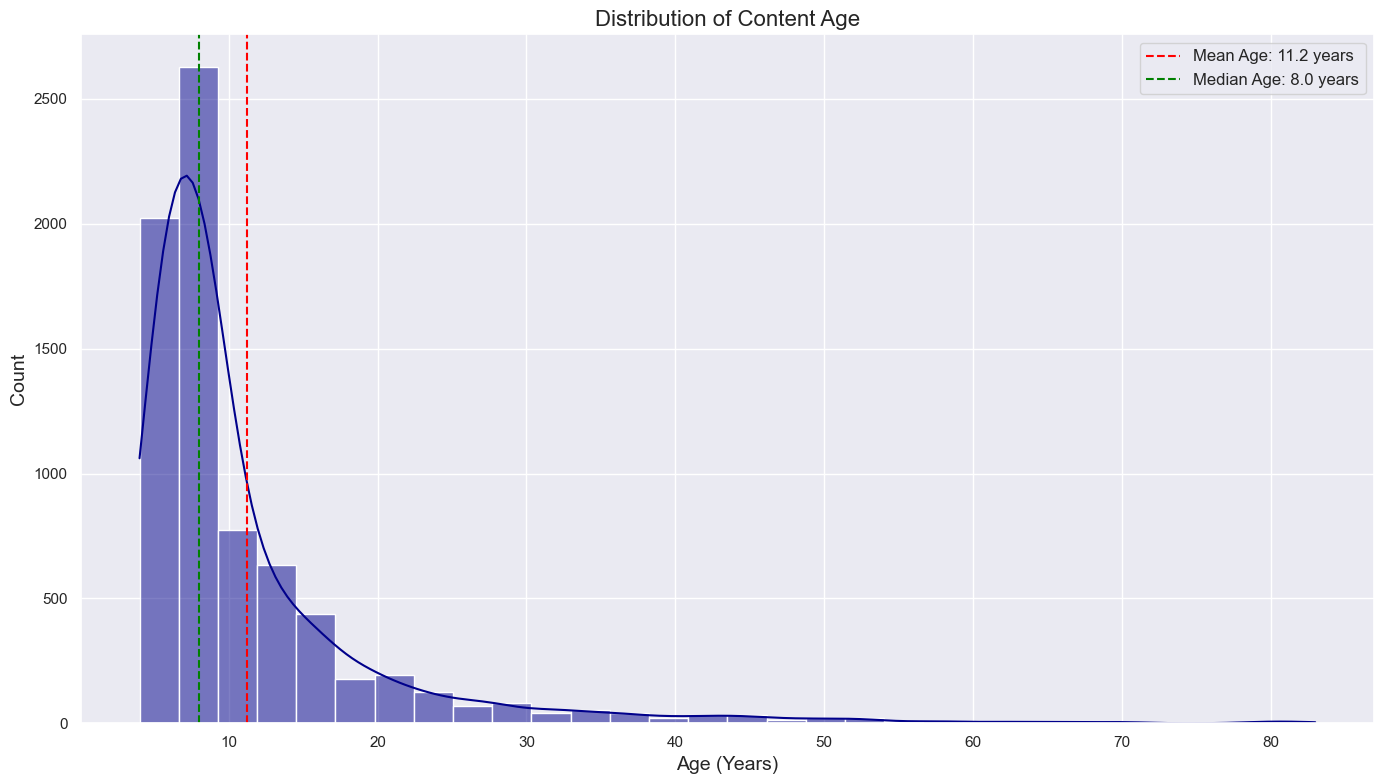

In [51]:
# 12. Content Age Analysis
print("\n12. Content Age Analysis")

# Calculate content age (years since release)
current_year = datetime.now().year
df['content_age'] = current_year - df['release_year']

# Content age distribution
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(df['content_age'], bins=30, kde=True, ax=ax, color='darkblue')
ax.set_title('Distribution of Content Age', fontsize=16)
ax.set_xlabel('Age (Years)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.axvline(df['content_age'].mean(), color='red', linestyle='--', label=f'Mean Age: {df["content_age"].mean():.1f} years')
ax.axvline(df['content_age'].median(), color='green', linestyle='--', label=f'Median Age: {df["content_age"].median():.1f} years')
ax.legend(fontsize=12)

plt.tight_layout()
plt.savefig('content_age_distribution.png')

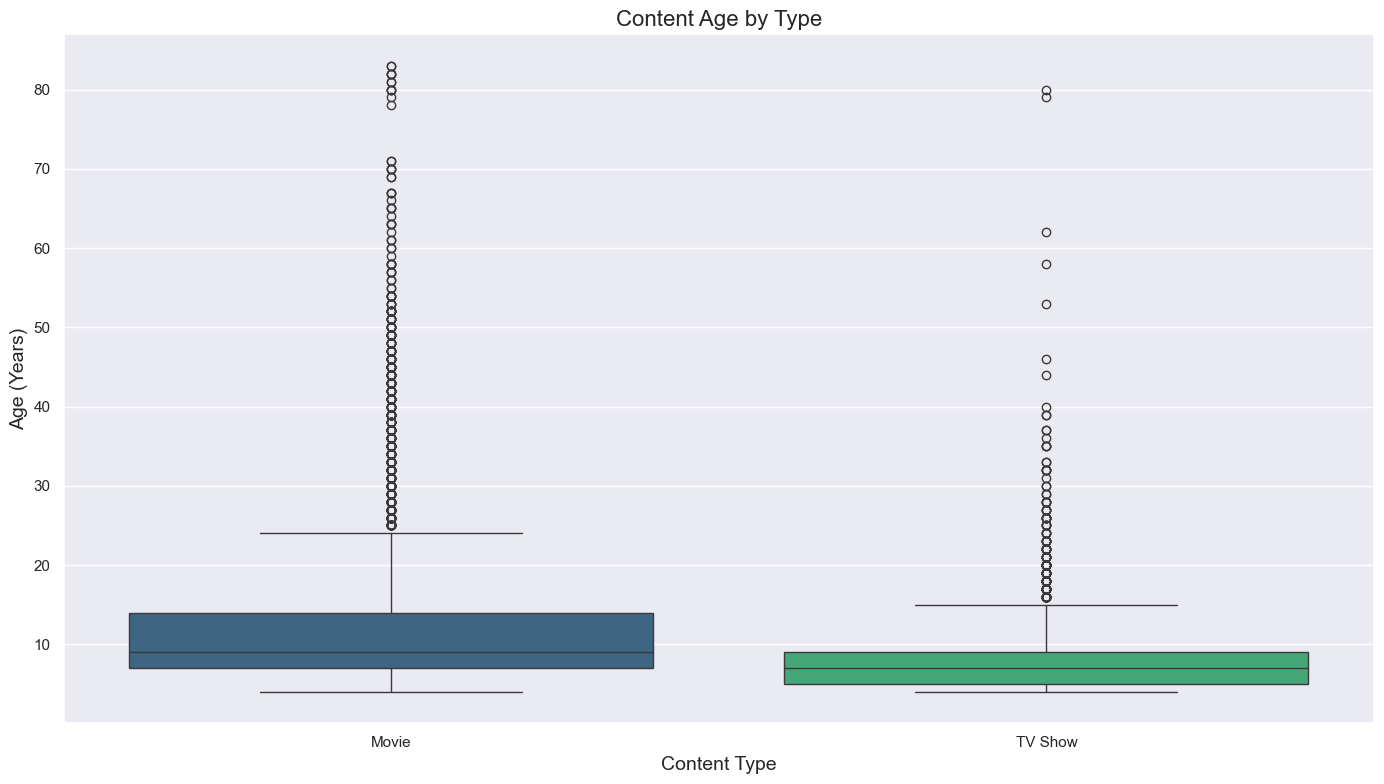

In [52]:
# Content age by type
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(x='type', y='content_age', data=df, palette='viridis', ax=ax)
ax.set_title('Content Age by Type', fontsize=16)
ax.set_xlabel('Content Type', fontsize=14)
ax.set_ylabel('Age (Years)', fontsize=14)

plt.tight_layout()
plt.savefig('content_age_by_type.png')


13. Summary Statistics
       release_year  movie_duration      seasons                     added_date  content_age
count   7472.000000     5421.000000  2051.000000                           7402  7472.000000
mean    2013.801526      101.060505     1.837640  2019-05-03 05:25:39.800054016    11.198474
min     1942.000000        3.000000     1.000000            2008-01-01 00:00:00     4.000000
25%     2013.000000       88.000000     1.000000            2018-04-02 00:00:00     6.000000
50%     2017.000000       99.000000     1.000000            2019-07-01 00:00:00     8.000000
75%     2019.000000      115.000000     2.000000            2020-07-10 00:00:00    12.000000
max     2021.000000      312.000000    17.000000            2021-09-25 00:00:00    83.000000
std        9.060429       26.941902     1.630343                            NaN     9.060429

Analysis complete! All visualizations have been saved.


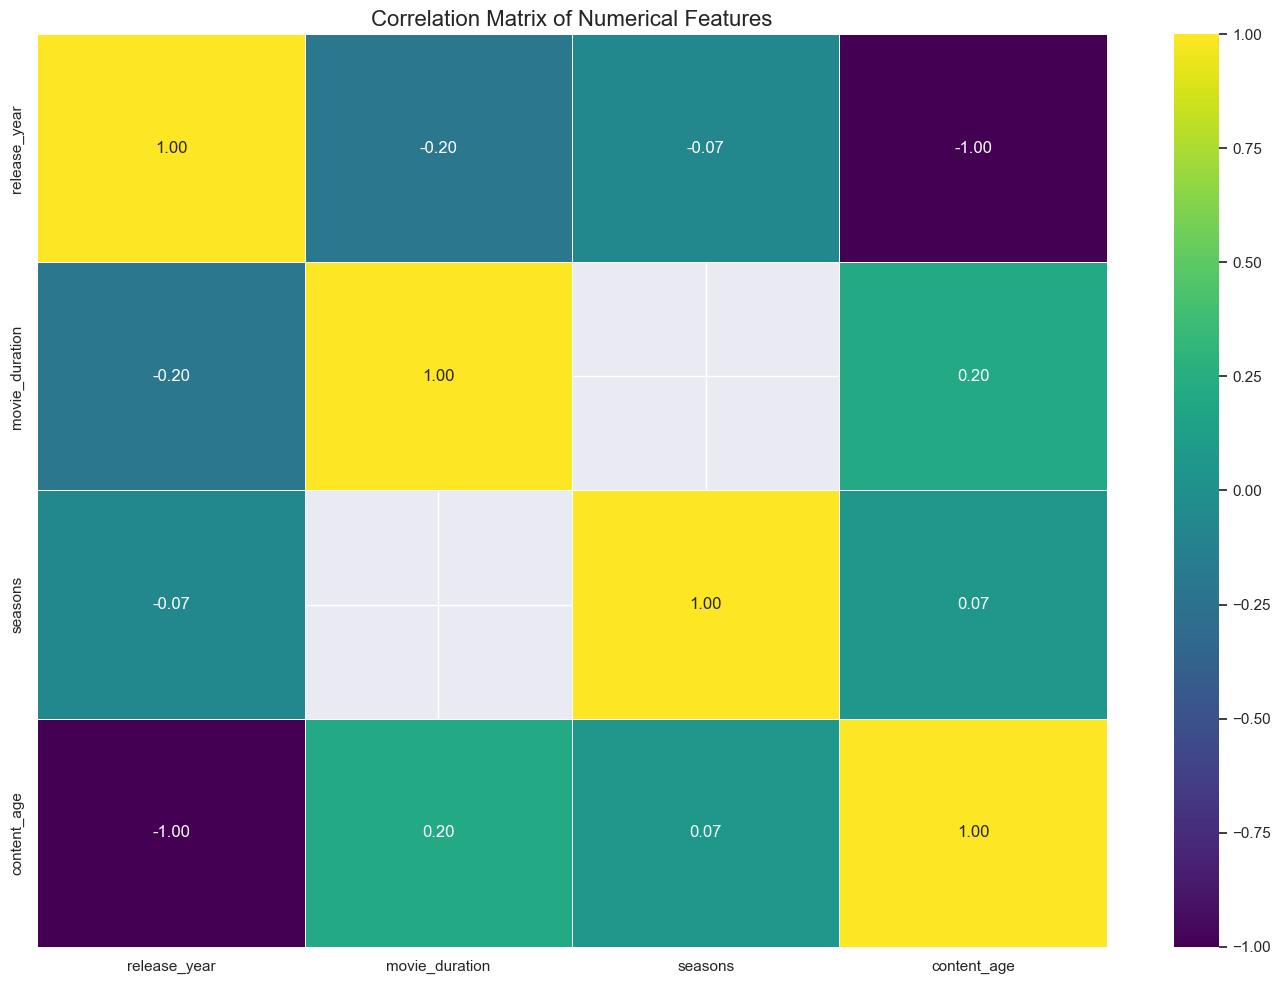

In [53]:
# 13. Summary Statistics
print("\n13. Summary Statistics")

# Summary statistics for numerical columns
print(df.describe())

# Correlation matrix for numerical columns
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()

# Plot correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_matrix.png')

print("\nAnalysis complete! All visualizations have been saved.")